# Google Colaboratary

Mounting Google Drive 

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import cv2
import glob
import tensorflow as tf
from scipy.misc import imread
from tqdm import tqdm
from PIL import Image
from numpy import*

train_path = Path("/content/gdrive/My Drive/Colab Notebooks/datasetimg/Google Images/train")
val_path = Path("/content/gdrive/My Drive/Colab Notebooks/datasetimg/Google Images/val")

In [49]:
data_list = os.listdir(train_path)
data_list

['Burj Khalifa - UAE',
 'Eiffel Tower - Paris',
 'Machu Pichu',
 'Great Wall Of China - China',
 'Himalaya - India',
 'Christ the Reedemer Statue',
 'Chich-n Itz - Mexico',
 'Antarctica',
 'Giant-s Causeway',
 'The Blue Grotto - Capri',
 'Stonehenge',
 'Niagara Falls',
 'Taj Mahal - India',
 'Pyramids Of Giza - Egypt',
 'Venezuela Angel Falls',
 'Santorini',
 'Roman Colosseum - Rome',
 'Statue Of Liberty - NYC']

Resizing image

In [0]:
IMAGE_SIZE = [250, 250]

Adding preprocessing layer to vgg16<br>
Defining 'imagenet' weights<br>
Excluding last layer from model

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Disabling existing trained weights from model

In [0]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense

Flatten all layers so far 

In [0]:
x = Flatten()(vgg.output)

Add last layer as dense layer with the length of data

In [ ]:
prediction = Dense(len(data_list), activation='softmax')(x)

Creating Model's object

In [0]:
from keras.models import Model
model = Model(inputs=vgg.input, outputs=prediction)

Compiling..

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
            rotation_range=9, # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image 
            width_shift_range=0.2,  # randomly shift images horizontally 
            height_shift_range=0.2)  # randomly shift images vertically 

val_datagen = ImageDataGenerator(rescale = 1./255)

Providing training and validation directory path, target size, batch size, class mode

In [59]:
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/datasetimg/Google Images/train',
                                                 target_size = (250, 250),
                                                 batch_size = 32,   
                                                 class_mode = 'categorical')

Found 2872 images belonging to 18 classes.


In [60]:
test_set = val_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/datasetimg/Google Images/val',
                                            target_size = (250, 250),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 762 images belonging to 18 classes.


In [0]:
#if interrupted with 'OS Error: Trunc Error'
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True

Fitting Model

In [63]:
fit_ = model.fit_generator(training_set, validation_data=test_set, epochs=15)

Epoch 1/15
90/90 [==============================] - 126s 1s/step - loss: 0.8819 - acc: 0.7368 - val_loss: 0.5220 - val_acc: 0.8412
Epoch 2/15
90/90 [==============================] - 107s 1s/step - loss: 0.6037 - acc: 0.8171 - val_loss: 0.3227 - val_acc: 0.8950
Epoch 3/15
90/90 [==============================] - 110s 1s/step - loss: 0.4614 - acc: 0.8605 - val_loss: 0.2719 - val_acc: 0.9199
Epoch 4/15
90/90 [==============================] - 108s 1s/step - loss: 0.3375 - acc: 0.8965 - val_loss: 0.1914 - val_acc: 0.9331
Epoch 5/15
90/90 [==============================] - 111s 1s/step - loss: 0.2787 - acc: 0.9145 - val_loss: 0.1781 - val_acc: 0.9383
Epoch 6/15
90/90 [==============================] - 109s 1s/step - loss: 0.2488 - acc: 0.9216 - val_loss: 0.0885 - val_acc: 0.9803
Epoch 7/15
90/90 [==============================] - 105s 1s/step - loss: 0.2580 - acc: 0.9141 - val_loss: 0.0799 - val_acc: 0.9764
Epoch 8/15
90/90 [==============================] - 108s 1s/step - loss: 0.2132 - a

Interpreting Obtained Results

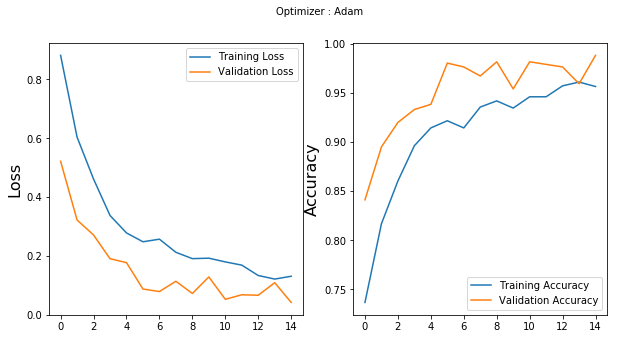

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(fit_.history['loss'], label='Training Loss')
plt.plot(fit_.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(fit_.history['acc'], label='Training Accuracy')
plt.plot(fit_.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()